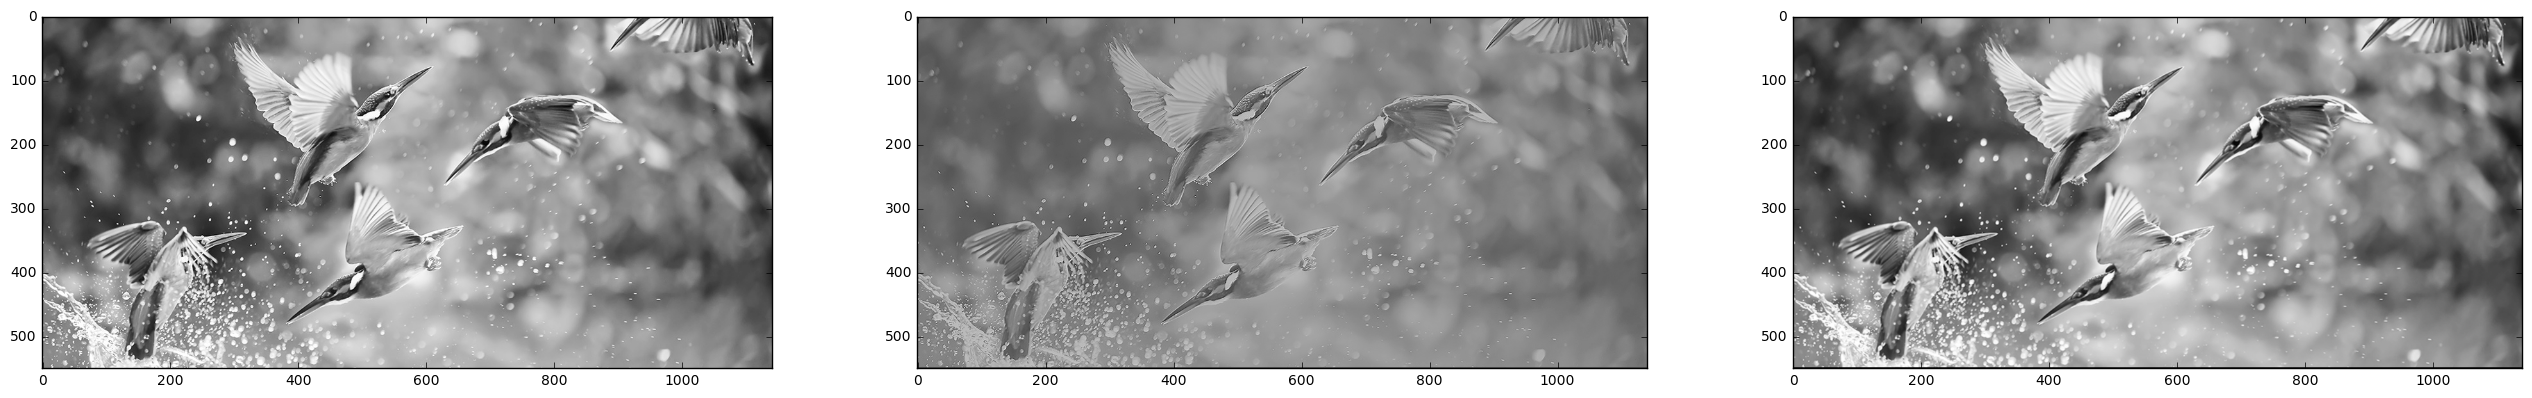

In [11]:
#convolusion
from PIL import Image
from pylab import *
from math import *
import cv2
import numpy as np

img=cv2.imread('bird.jpg',0)
row,col=img.shape

laplacian=np.zeros((row,col))
averaging=np.zeros((row,col))

maskSize=3
mask=np.zeros((maskSize,maskSize))

#laplacian
weight=maskSize*maskSize
#for i in range(maskSize):
#    for j in range (maskSize):
#        x = raw_input('Enter the numbers into the array: ')
#        data[i][j].append(x)
#        weight=weight+data[i][j]

mask=[[0,-1,0],[-1,4,-1],[0,-1,0]]

for k in range (maskSize//2,row-(maskSize//2)):
    for l in range (maskSize//2,col-(maskSize//2)):
        acc=0
        for i in range (-(maskSize//2),maskSize//2):
            for j in range (-(maskSize//2),maskSize//2):
                acc=acc+img[k-i][l-j]*mask[i+(maskSize//2)][j+(maskSize//2)]
        laplacian[k][l]=acc

# averaging

mask=[[1,1,1],[1,1,1],[1,1,1]]

for k in range (maskSize//2,row-(maskSize//2)):
    for l in range (maskSize//2,col-(maskSize//2)):
        acc=0
        for i in range (-(maskSize//2),maskSize//2):
            for j in range (-(maskSize//2),maskSize//2):
                acc=acc+img[k+i][l+j]*mask[i+1][j+1]
        averaging[k][l]=acc /weight

#laplacian=uint8(laplacian)
#averaging=uint8(averaging)
#cv2.imshow('original',img)
#cv2.imshow('laplacian',laplacian)
#cv2.imshow('averaging',averaging)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

fig, axs = subplots(1, 3, figsize=(32, 32))
axs[0].imshow(img)
axs[0].axis('on')
axs[1].imshow(laplacian)
axs[1].axis('on')
axs[2].imshow(averaging)
axs[2].axis('on')
gray()
show()

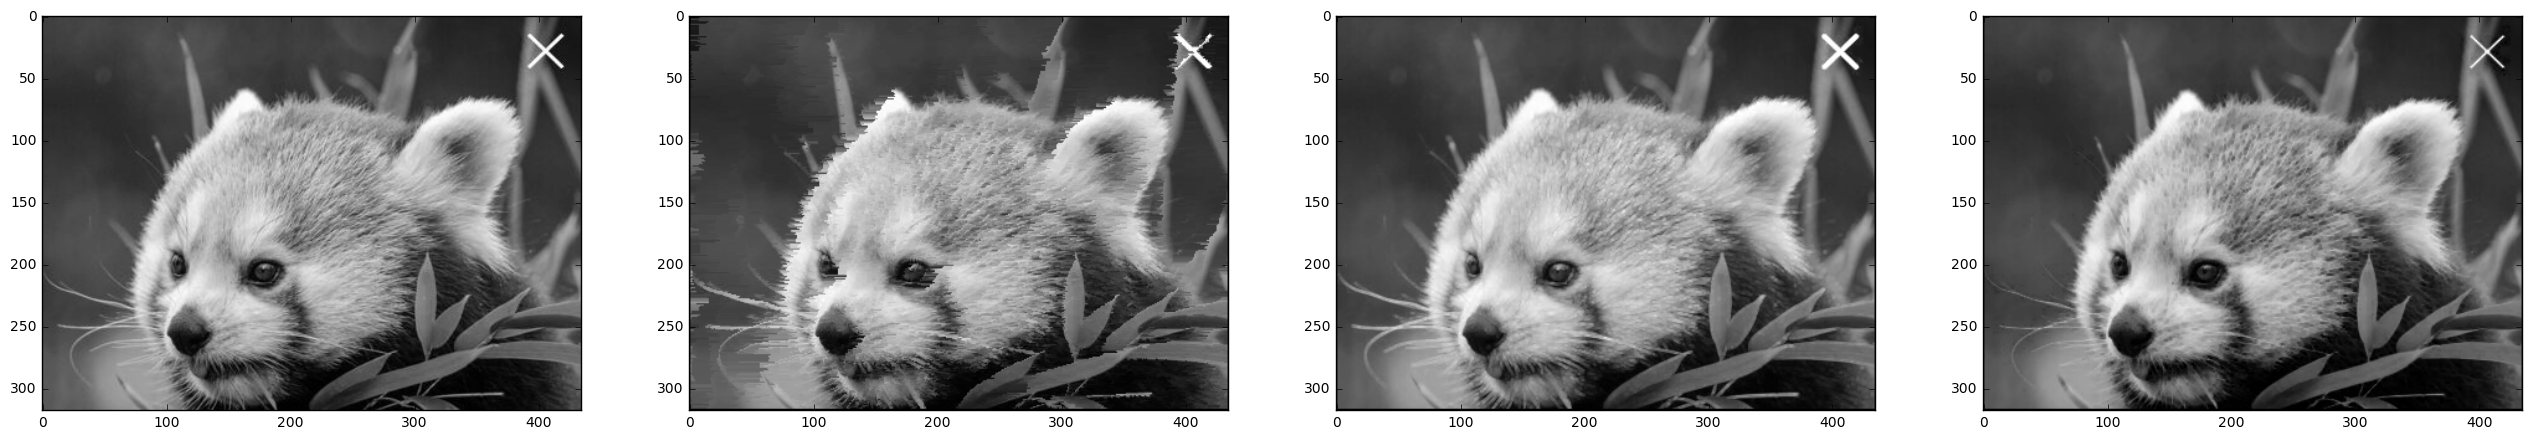

In [25]:
#median, max, min
from PIL import Image
from pylab import *
from math import *
import cv2
import numpy as np

img=cv2.imread('red panda.jpg',0)
row,col=img.shape

maskSize=3
median=np.zeros((row,col))
maximum=np.zeros((row,col))
minimum=np.zeros((row,col))
sort=np.zeros(maskSize*maskSize)

for k in range (maskSize//2,row-(maskSize//2)):
    for l in range (maskSize//2,col-(maskSize//2)):
        x=0
        for i in range (-(maskSize//2),maskSize//2):
            for j in range (-(maskSize//2),maskSize//2):
                #insertion sort
                insert=0
                for a in range (x):
                    if sort[a]>img[k+i][l+j]:
                        for b in range (x,a,-1):
                            sort[b+1]=sort[b]
                        sort[a]=img[k+i][l+j]
                        insert=1
                if insert==0:
                    sort[x]=img[k+i][l+j]
                x=x+1       
        median[k][l]=sort[maskSize*maskSize//2]

for k in range (maskSize//2,row-(maskSize//2)):
    for l in range (maskSize//2,col-(maskSize//2)):
        acc=0
        for i in range (-(maskSize//2),maskSize//2):
            for j in range (-(maskSize//2),maskSize//2):
                if img[k+i][l+j]>acc: 
                    acc=img[k+i][l+j]
        maximum[k][l]=acc

for k in range (maskSize//2,row-(maskSize//2)):
    for l in range (maskSize//2,col-(maskSize//2)):
        acc=255
        for i in range (-(maskSize//2),maskSize//2):
            for j in range (-(maskSize//2),maskSize//2):
                if img[k+i][l+j]<acc: 
                    acc=img[k+i][l+j]
        minimum[k][l]=acc
        
fig, axs = subplots(1, 4, figsize=(32, 32))
axs[0].imshow(img)
axs[0].axis('on')
axs[1].imshow(median)
axs[1].axis('on')
axs[2].imshow(maximum)
axs[2].axis('on')
axs[3].imshow(minimum)
axs[3].axis('on')
gray()
show()

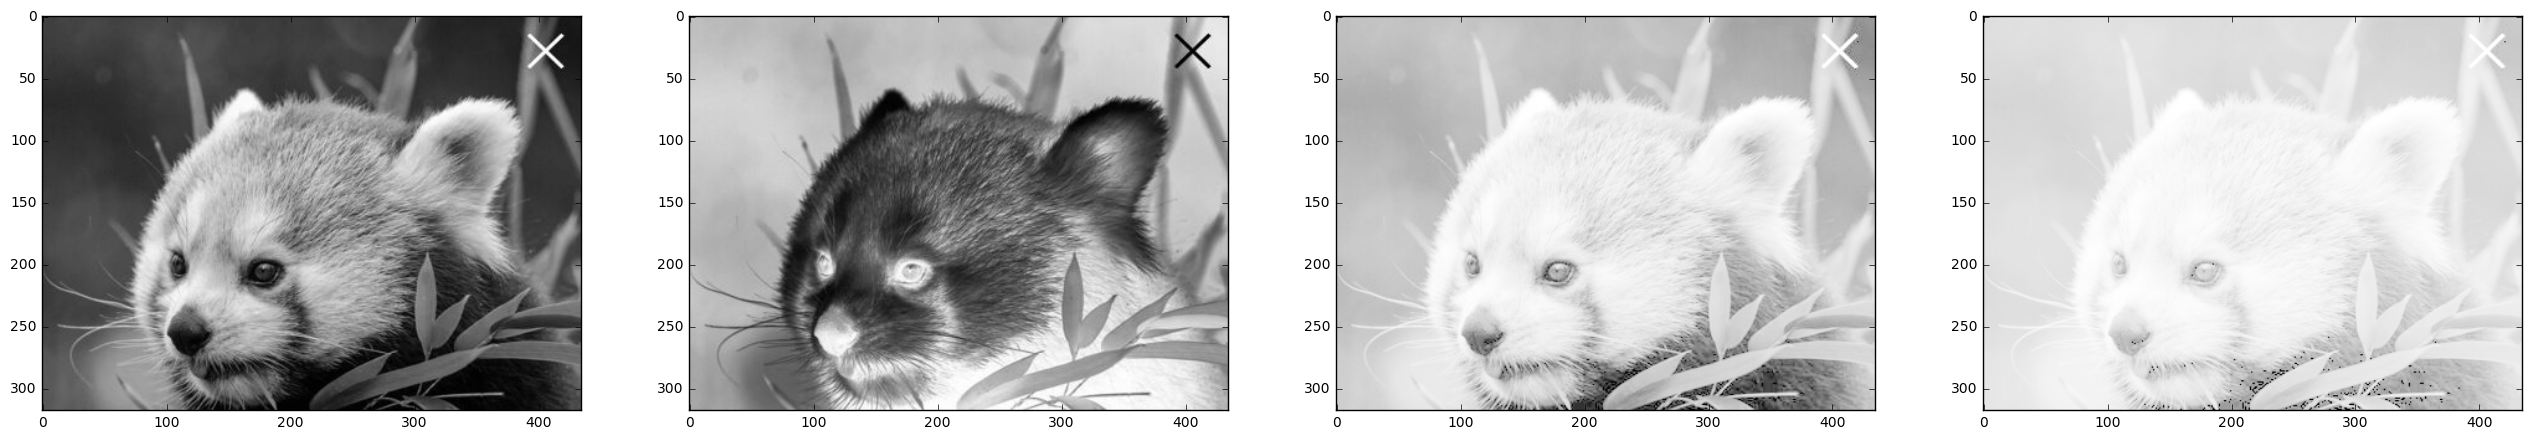

In [4]:
from PIL import Image
from pylab import *
from math import *
import cv2
import numpy as np

img=cv2.imread('red panda.jpg',0)
row,col=img.shape

negative=np.zeros((row,col))
for i in range (row):
    for j in range (col):
        negative[i][j]=255-img[i][j]

#negative=uint8(negative)

log=np.zeros((row,col))
for i in range (row):
    for j in range (col):
        log[i][j]=50*log10(1+img[i][j])

#log=uint8(log)

gamma=np.zeros((row,col))
g=0.1
for i in range (row):
    for j in range (col):
        gamma[i][j]=50*pow(img[i][j],g)

#gamma=uint8(log)

#cv2.imshow('original image',img)
#cv2.imshow('negative',negative)
#cv2.imshow('log transformation',log)
#cv2.imshow('gamma',gamma)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

fig, axs = subplots(1, 4, figsize=(32, 32))
axs[0].imshow(img)
axs[0].axis('on')
axs[1].imshow(negative)
axs[1].axis('on')
axs[2].imshow(log)
axs[2].axis('on')
axs[3].imshow(gamma)
axs[3].axis('on')
gray()
show()

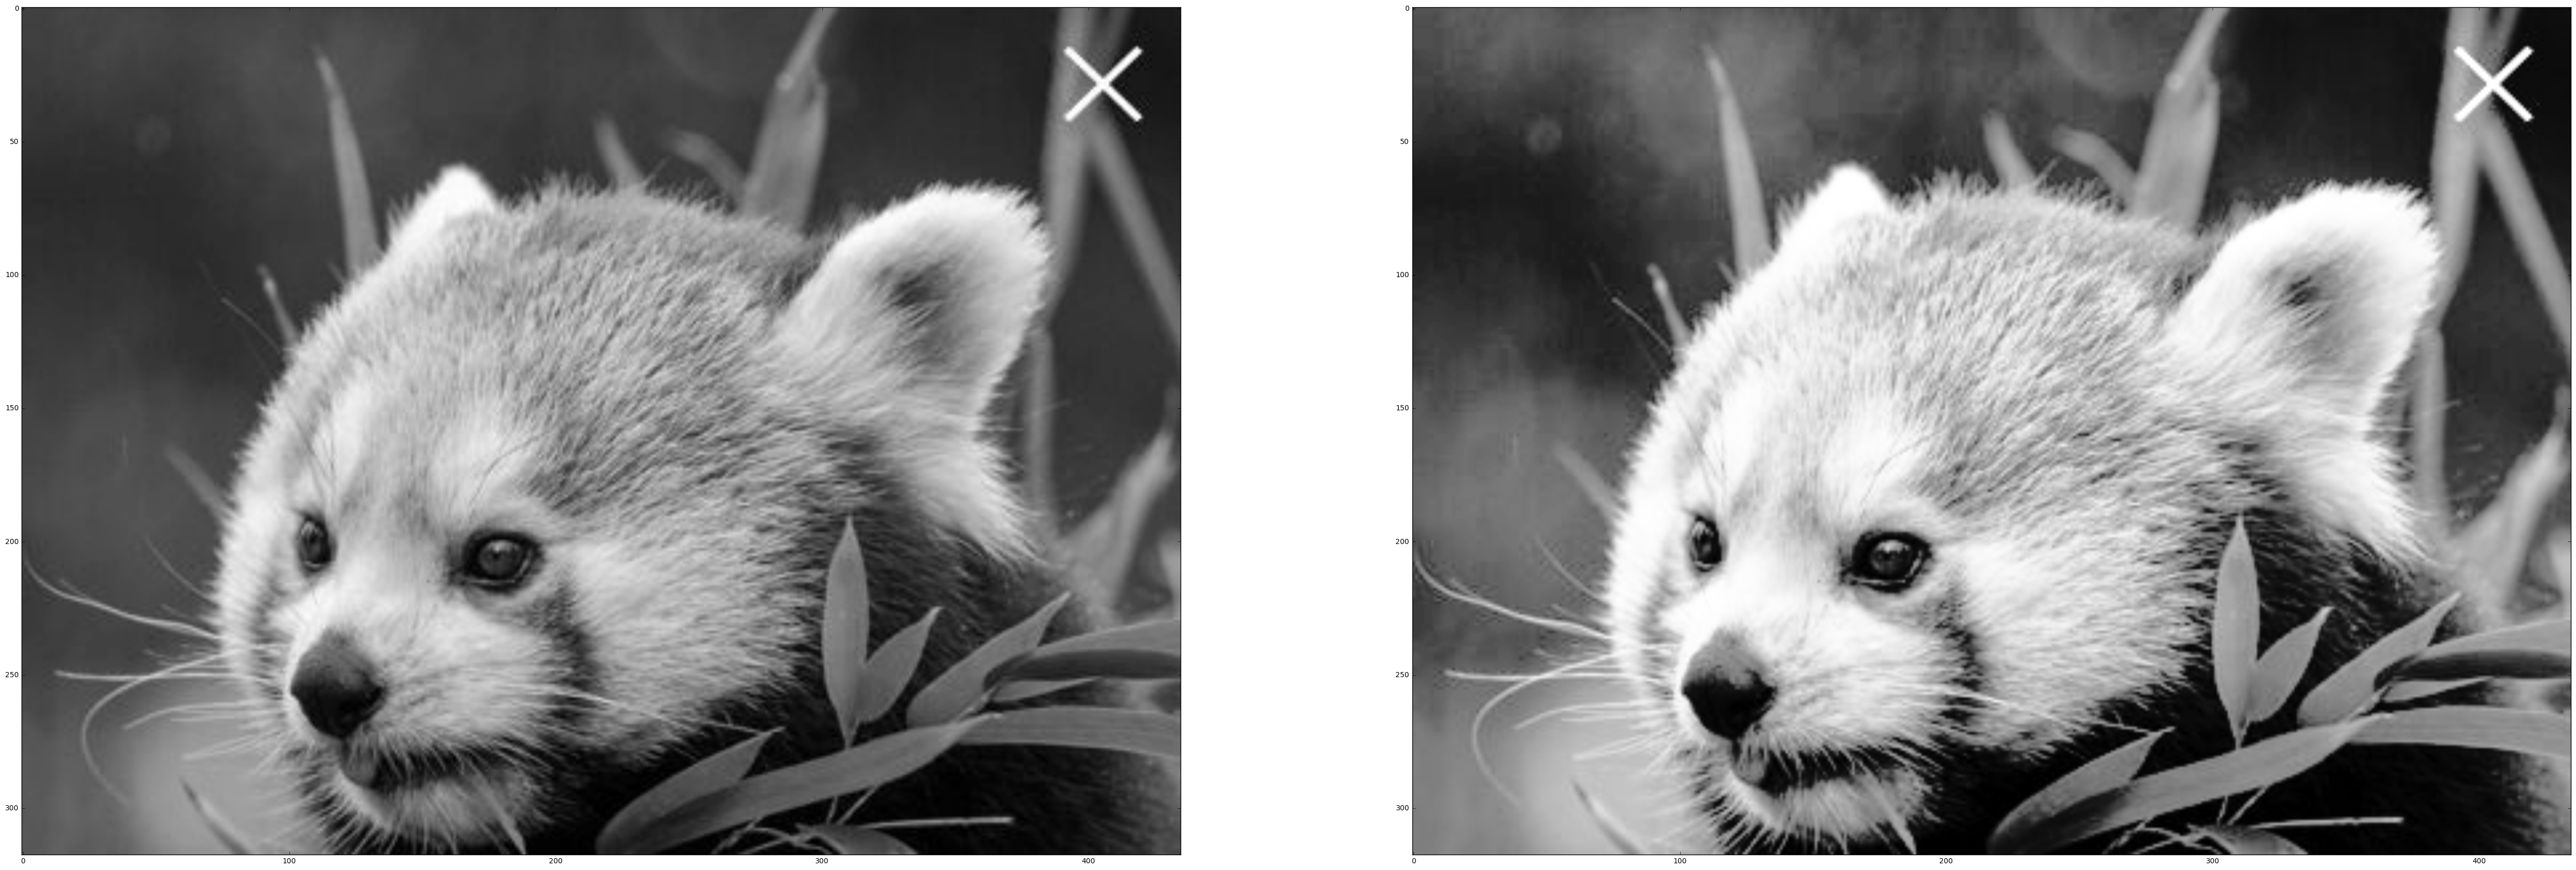

In [6]:
#histogram equalization
from PIL import Image
from pylab import *
from math import *
import cv2
import numpy as np

img=cv2.imread('red panda.jpg',0)
row,col=img.shape

histogram=np.zeros(256)
for i in range (row):
    for j in range (col):
        histogram[img[i][j]]=histogram[img[i][j]]+1

pr=np.zeros(256)
for i in range (256):
    pr[i]=histogram[i]/(row*col)

s=np.zeros(256)
for i in range (256):
    sum=0
    for j in range (i):
        sum=sum+pr[j]    
    s[i]=255*sum

result=np.zeros((row,col))

for i in range (row):
    for j in range (col):
        result[i][j]=s[img[i][j]]

#result=uint8(result)
#cv2.imshow('original',img)
#cv2.imshow('histogram equalization',result)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

fig, axs = subplots(1, 2, figsize=(64, 64))
axs[0].imshow(img)
axs[0].axis('on')
axs[1].imshow(result)
axs[1].axis('on')
gray()
show()        